# Test Grounds
Simple import/test harness to verify `chat.py` can be imported without starting the Discord bot.

In [5]:
"""
Simple import/test harness for chat.py

Run this to verify `chat.py` is importable from this repo without starting the Discord bot.
"""
from pathlib import Path
from langchain_core.messages import BaseMessage, HumanMessage, AIMessage
import sys
import os
from dotenv import load_dotenv

from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

# Dynamically locate the project root containing chat.py
try:
    notebook_path = Path(__file__).resolve()
except NameError:
    notebook_path = Path.cwd().resolve()
ROOT = None
for p in [notebook_path] + list(notebook_path.parents):
    if (p / 'chat.py').exists():
        ROOT = p
        break
if ROOT is None:
    # fallback: look for HealthAssistantDraft folder in parents
    for p in [notebook_path] + list(notebook_path.parents):
        if p.name == 'HealthAssistantDraft':
            ROOT = p
            break
if ROOT is None:
    ROOT = Path.cwd().resolve()
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

try:
    import chat
except Exception as e:
    print("Failed to import chat.py:", e)
    raise

load_dotenv(ROOT / ".env")
os.environ['GOOGLE_API_KEY'] = os.getenv('GOOGLE_API_KEY')
os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY')



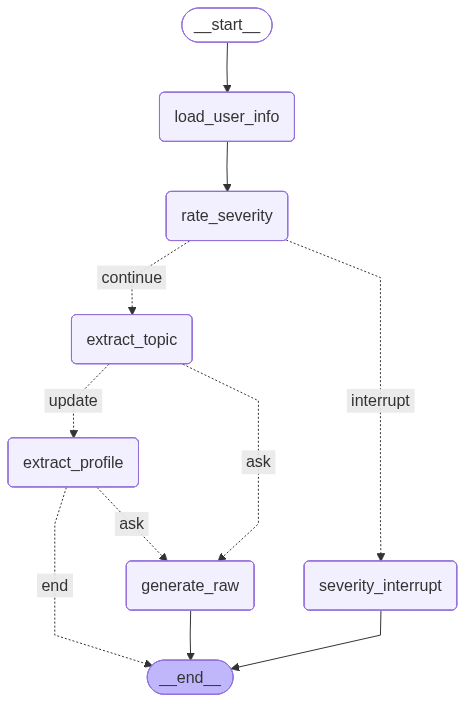

In [6]:
display(
    Image(
        chat.set_graph_response().get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API
        )
    )
)


In [3]:
msgs = [
    HumanMessage("Hello, my friend.")
]

msgs2 = [
    HumanMessage("ปวดหัว"),
    AIMessage("""การปวดหัวอาจมีสาเหตุได้หลายอย่างค่ะ ทั้งจากความเครียด การพักผ่อนไม่เพียงพอ สายตาอ่อนล้า หรืออาจมีสาเหตุที่ต้องพบแพทย์

        คำแนะนำเบื้องต้นที่อาจช่วยบรรเทาอาการปวดหัวได้:

        พักผ่อน: หาที่เงียบๆ และมืดสงบเพื่อนอนพักผ่อน
        ดื่มน้ำ: บางครั้งอาการปวดหัวอาจเกิดจากการขาดน้ำ ลองดื่มน้ำเปล่าให้เพียงพอ
        ประคบ: ใช้ผ้าชุบน้ำเย็นหรือน้ำอุ่นประคบบริเวณหน้าผากหรือท้ายทอย
        ผ่อนคลาย: ลองหาวิธีผ่อนคลาย เช่น การหายใจลึกๆ หรือการยืดเหยียดกล้ามเนื้อ

        หากอาการปวดหัวเป็นรุนแรง ปวดมากขึ้นเรื่อยๆ หรือมีอาการอื่นๆ ร่วมด้วย เช่น คอแข็ง มีไข้สูง อาเจียน หรือมีปัญหาทางระบบประสาท ควรรีบไปพบแพทย์ทันที เพื่อวินิจฉัยและรับการรักษาที่ถูกต้องนะคะ"""
    )
]


In [4]:
chat.generate_response(messages=msgs)


OutputParserException: Failed to parse SeverityRate from completion 0. Got: 1 validation error for SeverityRate
  Input should be a valid dictionary or instance of SeverityRate [type=model_type, input_value=0, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/model_type
For troubleshooting, visit: https://docs.langchain.com/oss/python/langchain/errors/OUTPUT_PARSING_FAILURE 